In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_colwidth', -1)


In [14]:
train_data = pd.read_csv("titanic_datasets/train.csv")
test_data = pd.read_csv("titanic_datasets/train.csv")

In [220]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [179]:
len(train_data)

891

### Explore PClass

In [11]:
# 1. See in each class, how many survived  - Histogram?
## 1.1 See which class have highest survived 
## 1.2 See which class have highest died

In [19]:
pclass_only = train_data[['Survived', 'Pclass']]

In [26]:
pclasses = train_data['Pclass'].unique()

In [213]:
print('Male ', len(train_data[train_data['Sex'] == 'male']))
print('Female ', len(train_data[train_data['Sex'] == 'female']))

Male  577
Female  314


In [341]:
fig_width = 10
fig_height = 5

#  Initial attempt under my belief that patches are as seen in plot... they are not. read further to explore.
# def get_cat_count(patch_idx, ax):
#     list_all = [p.get_height() for p in ax.patches]
#     data_len = sum(list_all)
#     print('data_len: ', data_len, ', list_all: ', list_all)
    
#     if (len(ax.patches) % 2) == 0:
#         count = 0
#         no_cats = int(len(ax.patches)/2)
#         if (patch_idx%2) == 0:
#             list_e = [p.get_height() for p in ax.patches[0::2]]
#             count = sum(list_e)
#             print('count_even: ', count, ', list_o: ', list_e)
#         else:
#             list_o = [p.get_height() for p in ax.patches[1::2]]
#             count = sum(list_o)
#             print('count_odd', count, ', list_o: ', list_o)
#         return count
#     else:
#         return data_len

def get_totals_dictionary(ax):
    labels = ax.get_xticklabels() # get x labels
    # counts = [sum([x,y]) for x,y in zip(heights[::len(labels)], heights[1::len(labels)])]

    heights = [(x.get_x(), x.get_height()) for x in ax.patches]
    # print('heights ', heights)
    print('heights s1', heights[::len(labels)])
    print('heights s2', heights[1::len(labels)])
    response = dict()
    for x, y in zip(list(heights)[::len(labels)], list(heights)[1::len(labels)]):
        print(x, '-', y)
        response[x[0]] = x[1] + y[1]
        response[y[0]] = response[x[0]]

    print(response) 
    return response
    
def countplot(x_, hue_, data_, figsize_):
    plt.subplots(figsize=figsize_)
    
    if hue_ is None:
        ax = sns.countplot(x=x_, data = data_)
    else:
        ax = sns.countplot(x=x_, hue=hue_, data = data_)        
    
    labels = ax.get_xticklabels() # get x labels
    patch_totals = get_totals_dictionary(ax)
    patch_i = 0
    for p in ax.patches:
        cat_count = get_cat_count(patch_i, ax)
        ax.annotate('{:.2f}% ({})'.format(p.get_height()*100/patch_totals[p.get_x()], p.get_height()),
                    (p.get_x() + p.get_width()/4, p.get_height()+2))
        ax.set_xticklabels(labels, rotation=0) # set new labels
        patch_i +=1

#### Guide print( nums [ start_inclus_idx : stop_exclus_idx : every_nth_num] )

heights s1 [(-0.4, 80), (-0.13333333333333333, 97), (0.13333333333333336, 372)]
heights s2 [(0.6, 136), (0.8666666666666667, 87), (1.1333333333333333, 119)]
(-0.4, 80) - (0.6, 136)
(-0.13333333333333333, 97) - (0.8666666666666667, 87)
(0.13333333333333336, 372) - (1.1333333333333333, 119)
{-0.4: 216, 0.6: 216, -0.13333333333333333: 184, 0.8666666666666667: 184, 0.13333333333333336: 491, 1.1333333333333333: 491}


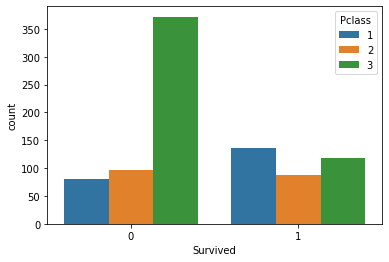

In [340]:
ax = sns.countplot(x='Survived', hue='Pclass', data = train_data)
labels = ax.get_xticklabels() # get x labels
# counts = [sum([x,y]) for x,y in zip(heights[::len(labels)], heights[1::len(labels)])]

heights = [(x.get_x(), x.get_height()) for x in ax.patches]
# print('heights ', heights)
print('heights s1', heights[::len(labels)])
print('heights s2', heights[1::len(labels)])
response = dict()
for x, y in zip(list(heights)[::len(labels)], list(heights)[1::len(labels)]):
    print(x, '-', y)
    response[x[0]] = x[1] + y[1]
    response[y[0]] = response[x[0]]

print(response)    
# [[x,y] for x, y in zip(list(heights[::2], list(heights[1::2])))] 

# tup = [(ind, sum(x)) for ind, x in zip(list(heights.values())[::2], list(heights.values())[1::2]))]
# print(tup)
# [y for x,y in tup if x == 0]

In [312]:
a = [468, 109, 81, 233]
tup = [(ind, sum(x)) for ind, x in enumerate(zip(a[::2], a[1::2]))]
print(tup)
inx = 0
cats = int(len(a)/2)

for i in a:
    print([y for x,y in tup if x == inx])
    inx +=1

[(0, 577), (1, 314)]
[577]
[314]
[]
[]


In [235]:
print(get_cat_count(0, ax))
print('------------------')
print(get_cat_count(1, ax))
print('------------------')
print(get_cat_count(2, ax))
print('------------------')
print(get_cat_count(3, ax))

data_len:  891 , list_all:  [468, 109, 81, 233]
count_even:  549 , list_o:  [468, 81]
549
------------------
data_len:  891 , list_all:  [468, 109, 81, 233]
count_odd 342 , list_o:  [109, 233]
342
------------------
data_len:  891 , list_all:  [468, 109, 81, 233]
count_even:  549 , list_o:  [468, 81]
549
------------------
data_len:  891 , list_all:  [468, 109, 81, 233]
count_odd 342 , list_o:  [109, 233]
342
[10, 20, 30, 40, 50]
[20, 30, 40, 50, 60]
10 - 20
20 - 30
30 - 40
40 - 50
50 - 60


[30, 50, 70, 90, 110]

# Important lesson learnt!
## Male 577 : 468 + 109
### Contrary to my intution that the patches are sorted as seen in chart, they are NOT. Infact the patches are sorted as category wise 
### i.e. if there are two categories (or classes in this case M and F) then patches list is [patch_1_cat_1, patch_2_cat_1, patch_3_cat_2, patch_4_cat_2]
### but we see them as [patch_1_cat_1, patch_2_cat_2, patch_3_cat_1, patch_4_cat_2]

## Total Fatality Rate

heights s1 [(-0.4, 549)]
heights s2 [(0.6, 342)]
(-0.4, 549) - (0.6, 342)
{-0.4: 891, 0.6: 891}
data_len:  891 , list_all:  [549, 342]
count_even:  549 , list_o:  [549]
data_len:  891 , list_all:  [549, 342]
count_odd 342 , list_o:  [342]


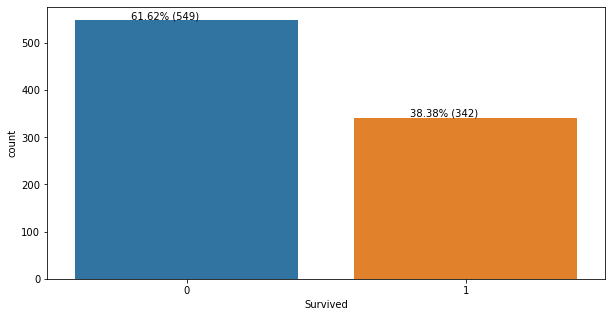

In [342]:
countplot('Survived', None, train_data, (10,5))

## Class wise survival

heights s1 [(-0.4, 80), (-0.13333333333333333, 97), (0.13333333333333336, 372)]
heights s2 [(0.6, 136), (0.8666666666666667, 87), (1.1333333333333333, 119)]
(-0.4, 80) - (0.6, 136)
(-0.13333333333333333, 97) - (0.8666666666666667, 87)
(0.13333333333333336, 372) - (1.1333333333333333, 119)
{-0.4: 216, 0.6: 216, -0.13333333333333333: 184, 0.8666666666666667: 184, 0.13333333333333336: 491, 1.1333333333333333: 491}
data_len:  891 , list_all:  [80, 136, 97, 87, 372, 119]
count_even:  549 , list_o:  [80, 97, 372]
data_len:  891 , list_all:  [80, 136, 97, 87, 372, 119]
count_odd 342 , list_o:  [136, 87, 119]
data_len:  891 , list_all:  [80, 136, 97, 87, 372, 119]
count_even:  549 , list_o:  [80, 97, 372]
data_len:  891 , list_all:  [80, 136, 97, 87, 372, 119]
count_odd 342 , list_o:  [136, 87, 119]
data_len:  891 , list_all:  [80, 136, 97, 87, 372, 119]
count_even:  549 , list_o:  [80, 97, 372]
data_len:  891 , list_all:  [80, 136, 97, 87, 372, 119]
count_odd 342 , list_o:  [136, 87, 119]


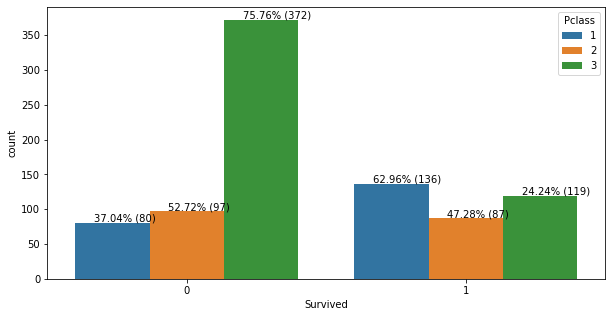

In [343]:
countplot('Survived', 'Pclass', train_data, (10,5))

### Gender wise survival

heights s1 [(-0.4, 468), (-2.7755575615628914e-17, 81)]
heights s2 [(0.6000000000000001, 109), (0.9999999999999999, 233)]
(-0.4, 468) - (0.6000000000000001, 109)
(-2.7755575615628914e-17, 81) - (0.9999999999999999, 233)
{-0.4: 577, 0.6000000000000001: 577, -2.7755575615628914e-17: 314, 0.9999999999999999: 314}
data_len:  891 , list_all:  [468, 109, 81, 233]
count_even:  549 , list_o:  [468, 81]
data_len:  891 , list_all:  [468, 109, 81, 233]
count_odd 342 , list_o:  [109, 233]
data_len:  891 , list_all:  [468, 109, 81, 233]
count_even:  549 , list_o:  [468, 81]
data_len:  891 , list_all:  [468, 109, 81, 233]
count_odd 342 , list_o:  [109, 233]


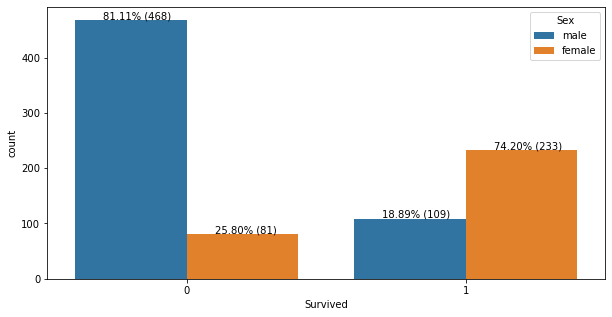

In [344]:
countplot('Survived', 'Sex', train_data, (10,5))

### C3 died the most
### C2 ~ half died 
### C1 died least
### Males died more than females.

In [137]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095
